# Лекция №3. Организация программ

П.Н. Советов, РТУ МИРЭА

## Модули

Модули позволяют разбить программу на независимые части. В Питоне каждый модуль располагается в отдельном файле. Уже знакомое нам ключевое слово `import` используется для загрузки и исполнения модуля.

Обратиться к элементам пространства имен модуля можно, как мы тоже уже знаем, с использованием точки:

In [1]:
import math

math.sin(math.pi / 2)

1.0

С помощью функции `dir` можно узнать содержимое пространства имен загруженного модуля:

In [2]:
print(dir(math))

['__doc__', '__loader__', '__name__', '__package__', '__spec__', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atan2', 'atanh', 'ceil', 'comb', 'copysign', 'cos', 'cosh', 'degrees', 'dist', 'e', 'erf', 'erfc', 'exp', 'expm1', 'fabs', 'factorial', 'floor', 'fmod', 'frexp', 'fsum', 'gamma', 'gcd', 'hypot', 'inf', 'isclose', 'isfinite', 'isinf', 'isnan', 'isqrt', 'ldexp', 'lgamma', 'log', 'log10', 'log1p', 'log2', 'modf', 'nan', 'perm', 'pi', 'pow', 'prod', 'radians', 'remainder', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'tau', 'trunc']


Для импортирования конкретных функций из модуля используется `from`:

In [3]:
from math import sin, pi

sin(pi / 2)

1.0

С помощью звездочки можно импортировать все пространство имен модуля в текущее пространство имен:

In [4]:
from math import *

sin(pi / 2)

1.0

При этом следует по возможности избегать бесконтрольного импорта всего содержимого модуля.

Хорошим тоном считается описание импорта каждого модуля отдельной строкой. То есть:

```Python
import sys
import math
```

вместо

```Python
import sys, math
```

Каждый модуль импортируется и исполняется только один раз. Повторный импорт приводит к ссылке на уже загруженный ранее модуль.

Модули не могут взаимно импорировать друг друга. В большинстве случаев полезнее не пытаться искать обходные пути для решения этой проблемы, а попробовать реорганизовать программу так, чтобы взаимные связи между модулями исчезли.

Имя текущего модуля хранится в глобальной переменной `__name__`. Этим фактом можно воспользоваться, чтобы менять поведение модуля в зависимости от того, каким образом он был загружен: с помощью `import` или как главный скрипт:

In [5]:
def test_module():
    print('Запуск в режиме скрипта.')
    
if __name__ == '__main__':
    test_module()

Запуск в режиме скрипта.


## Пакеты

Сложные иерархии из модулей строятся с помощью пакетов. Пакет представляет собой пространство имен для коллекции модулей.

Например, пакет sly из проекта [SLY](https://github.com/dabeaz/sly) представляет собой одноименный каталог, в котором содержатся следующие файлы:

```
sly/
    __init__.py
    ast.py
    docparse.py
    lex.py
    yacc.py
```

Помимо коллекции модулей здесь имеется специальный файл `__init__.py`, определяющий, что каталог является пакетом.

Импортирование отдельных модулей из пространства имен пакета осуществляется традиционным образом: `import sly.lex` или `from sly import lex`.

Импортирование модулей внутри пакета происходит в особом относительном режиме с предваряющей точкой, обозначающей текущий пакет: `from . import lex` (импорт всего модуля `lex`) или `from .lex import Lex` (импорт класса `Lex` из `lex`).

Файл `__init__.py` может содержать код для импорта отдельных модулей из пакета. В примере с пакетом sly организовано автоматическое подключение модулей при вызове `import sly`. Содержимое `__init__.py` имеет следующий вид:

```
from .lex import *
from .yacc import *
...
```

Выполнение отдельного модуля из пакета производится с помощью опции `-m`:

```
python -m пакет.модуль
```

### Установка пакетов

Сторонние пакеты устанавливаются с помощью менеджера пакета `pip`:

```
pip install sly
```

или

```
python -m pip install sly
```

Иногда полезно использовать виртуальное окружение с минимумом предустановленных пакетов. Это позволяет предотвратить конфликты между устанавливаемыми пакетами, а также дает возможность экспериментировать с новыми пакетами без замусоривания основного хранилища пакетов.

Создать новое виртуальное окружение:

```
python -m venv мое_окружение
```

Далее переход в новое окружение совершается с помощью запуска скрипта `activate`, находящегося внутри созданного каталога `мое_окружение`.


### Создание пакетов для других пользователей

Для получения дистрибутива пакета, пригодного для установки с помощью pip, необходимо создать файл setup.py рядом с каталогом пакета.

Пример содержимого setup.py:

```Python
# setup.py
import setuptools

setuptools.setup(
    name='mypackage', # Имя пакета
    version='0.0.1',  # Версия пакета
    author='Your Name',
    author_email='your@domain.com',
    description='My Package',
    packages=setuptools.find_packages(),
)
```

Если в состав пакета входят дополнительные файлы данных, то их необходимо перечислить в файле MANIFEST.in. Описание работы с этим файлом имеется в [официальной документации](https://packaging.python.org/guides/using-manifest-in/). В проекте sly содержимое этого файла имеет следующий вид:

```
recursive-include example *
recursive-include docs *
```

Создание дистрибутва производится с помощью следующей команды:

```
python setup.py sdist
```

Результат в виде архива с расширением .tar.gz можно найти в каталоге dist. Далее архив можно установить с помощью команды pip:

```
pip install mypackage-0.0.1.tar.gz
```

Пакет можно опубликовать в официальном репозитории, см. сайт [pypi.org](https://pypi.org/).

## Исключения

Исключения в Питоне, как и в С++ или Java, используются для обработки ошибок и других нештатных ситуаций, возникающих в процессе выполнения программы.

Например, при делении на нуль возникает исключение:

```
>>> def f():
...     return 1 / 0
...
>>> f()
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
  File "<stdin>", line 2, in f
ZeroDivisionError: division by zero
```

Здесь указан класс исключения (`ZeroDivisionError`), сообщение исключения (`division by zero`), а также результат трассировки со стеком последних вызовов (`Traceback`), приведших к возникновению исключения.

Сгенерировать исключение можно с помощью `raise`:

```
>>> raise ZeroDivisionError('Деление на нуль')
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ZeroDivisionError: Деление на нуль
```

Для обработки исключений используется конструкция `try/except`:

In [6]:
try:
    1 / 0
except ZeroDivisionError:
    print('Деление на нуль!')

Деление на нуль!


Следует стараться сократить до минимума блок, находящийся внутри `try/except`, что позволяет лучше локализовать ошибку. Это же касается обработки конкретного класса исключения в `except`. В примере ниже код обработки исключений излишне универсален:

In [7]:
try:
    1 / 0
except: # Слишком общий случай
    print('Деление на нуль!')

Деление на нуль!


При необходимости можно узнать подробности о полученном исключении:

In [8]:
try:
    1 / 0
except ZeroDivisionError as e: # e это объект класса ZeroDivisionError
    print(type(e), e)

<class 'ZeroDivisionError'> division by zero


Блок `finally` полезен, если необходимо осуществить некоторые завершающие действия (закрыть файл, разорвать соединение и так далее)  даже при возникновании исключений:

In [9]:
try:
    try:
        1 / 0
    finally:
        print('Уборка.')
except ZeroDivisionError:
    print('Деление на нуль!')

Уборка.
Деление на нуль!


Использование `with` в большинстве случаев позволяет обойтись без `finally`.

В блоке except можно повторно вызывать обрабатываемое исключение с помощью `raise` без параметров. Это используется, в частности, для ведения лога работы программы.

Легковесной альтернативой исключениям являются возвращаемые коды или специальные значения, сигнализирующие об ошибках. В Питоне принято использовать значение `None`, возвращение которого соответствует некоторой нестандартной ситуации. Преимуществами исключений, по сравнению с кодами ошибок, являются:

* Детальная информация об ошибке, включая стек вызовов.
* Отсутствие необходимости отслеживания возвращаемых значений функций, необязательность явной обработки ошибки.

При этом исключениями легко злоупотребить, использовать их в духе изощренного варианта GOTO. В частности, исключения иногда используются не для обработки ошибок, а в реализации алгоритмов, как в примере ниже:

In [10]:
def get_freq(text):
    freq = {}
    for w in text.split():
        try:
            freq[w] += 1
        except KeyError:
            freq[w] = 1
    return freq

Здесь можно было бы воспользоваться методом `get` и избавиться от обработки исключения:

In [11]:
def get_freq(text):
    freq = {}
    for w in text.split():
        freq[w] = freq.get(w, 0) + 1
    return freq

Или, еще лучше, использовать мощные возможности стандартной библиотеки Питона:

In [12]:
from collections import Counter

def get_freq(text):
    return Counter(text.split())

## Оформление программ

Стиль оформления программ на Питоне определен в [PEP 8](https://www.python.org/dev/peps/pep-0008/). Правил, изложенных в этом документе, желательно придерживаться. Особенно, если вы планируете показать свою программу другим разработчикам. Существует ряд инструментов, позволяющих автоматически проверить код на соответствие PEP 8, см., например, [pycodestyle](https://pypi.org/project/pycodestyle/). В развитых IDE такие инструменты уже встроены.

Файл модуля должен содержать текст в кодировке UTF-8. Общая структура модуля имеет следующий вид:

1. Комментарий-docstring модуля.
1. Импорты из стандартной библиотеки.
1. Импорты из сторонних библиотек.
1. Локальные импорты из приложения.
1. Глобальные переменные и константы.
1. Классы и функции.

Для отступов используется 4 пробела, а максимальная длина строки не должна превышать 79 символов.

Функции и классы в глобальном пространстве имен отделяются друг от друга 2 пустыми строками. Методы отделяются друг от друга 1 пустой строкой.

Для назначения имен используются следующие правила:

1. Пакеты и модули именуются с помощью коротких слов в нижнем регистре. Примеры: sys, math.
1. Для классов используются слова, начинающиеся с заглавной буквы и соединенные слитно. Примеры: MyClass, PathLike.
1. Имена функций, методов, аргументов и локальных переменных пишутся в нижнем регистре, слова разделяются символом подчеркивания. Примеры: read_all, generate.

## Профилирование программ

Для сбора характеристик выполненной программы используется встроенный профилировщик. Его можно вызвать следующим образом:

```
python -m cProfile программа.py
```

Результат профилирования:

```
         1395459 function calls (1392906 primitive calls) in 3.226 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     13/3    0.000    0.000    0.027    0.009 <frozen importlib._bootstrap>:1002(_find_and_load)
      3/2    0.000    0.000    0.001    0.001 <frozen importlib._bootstrap>:1033(_handle_fromlist)
       15    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:112(release)
       13    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:152(__init__)
       13    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:156(__enter__)
       13    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:160(__exit__)
       15    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:166(_get_module_lock)
       13    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:185(cb)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:203(_lock_unlock_module)
     18/3    0.000    0.000    0.023    0.008 <frozen importlib._bootstrap>:220(_call_with_frames_removed)

```

Здесь строка `Ordered by: standard name` означает, что вывод данных для отдельных функций/методов отсортирован по имени (см. последнюю колонку).

Удобной является сортировка по общему затраченному времени (`cumulative`) на выполнение:

```
python -m cProfile -s cumulative программа.py
```

```
         1315617 function calls (1313064 primitive calls) in 3.115 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     11/1    0.000    0.000    3.115    3.115 {built-in method builtins.exec}
        1    0.000    0.000    3.115    3.115 terrain.py:4(<module>)
        1    0.000    0.000    2.084    2.084 __init__.py:593(mainloop)
        1    0.042    0.042    2.084    2.084 {method 'mainloop' of '_tkinter.tkapp' objects}
       18    0.000    0.000    2.042    0.113 __init__.py:1880(__call__)
       17    0.000    0.000    2.035    0.120 __init__.py:804(callit)
       17    0.001    0.000    2.035    0.120 terrain.py:73(update_screen)
       17    1.146    0.067    1.929    0.113 terrain.py:51(render)
        1    0.004    0.004    0.911    0.911 terrain.py:37(__init__)
        1    0.002    0.002    0.835    0.835 terrain.py:18(load_data)
```

Описание колонок приведено в таблице:

| Имя колонки | Описание                                                |
|-------------|---------------------------------------------------------|
| ncalls      | Количество вызовов                                      |
| tottime     | Общее время работы функции, не включая время подфункций |
| percall     | tottime/ncalls                                          |
| cumtime     | Общее время работы функции                              |
| percall     | cumtime/ncalls                                          |

Для оценки производительности отдельной функции используется функция `timeit` из одноименного модуля:

```Python
>>> from timeit import timeit
>>> def f1(): return 2**64 - 1

>>> def f2(): math.pow(2, 64) - 1

>>> timeit(f1, number=1000000) # параметр number определяет число запусков функции
0.06563599999992675
>>> timeit(f2, number=1000000)
0.2985565000000179
```


## Jupyter-блокноты

Вычислительный блокнот (или просто "блокнот") является одним из способов организовать документацию и программу в одном документе. Блокноты традиционно используются в математических пакетах, таких, как Mathcad и Mathematica. Блокноты предназначены, в первую очередь, для создания специфического вида документированных программ — журналов или отчетов о проведенных вычислениях из области компьютерной алгебры, статистики, анализа данных, машинного обучения и других областей наук.

[Jupyter](https://jupyter.org/)-блокнот является веб-реализацией концепции интерактивных блокнотов. Поддерживается Питон, а также ряд других языков программирования. 

Для начала работы с Jupyter-блокнотами необходимо запустить сервер блокнотов, после чего просмотр и редактирование блокнотов можно осуществить в прямо в веб-бразуере.

Документ в формате Jupyter-блокнота имеет расширение .ipynb и содержит последовательность ячеек. Используется два основных вида ячеек:

1. Ячейки кода.
1. Ячейки текста.

Ячейки кода содержат текст на Питоне. В блокноте есть средства для выполнения отдельной ячейки, а также для последовательного выполнения всех ячеек документа.

Ячейки текста поддерживают формат Markdown с дополнительной возможностью записи формул в формате LaTeX.

При работе с блокнотом полезно держать под рукой перечень "горячих клавиш", с помощью которых осуществляются основные действия с документом. См. верхнее меню, последний пункт: Help->Keyboard Shortcuts.

## Библиотека Matplotlib

[Matplotlib](https://matplotlib.org/stable/index.html) — библиотека для визуализации данных. Поддерживается множество видов визуализации: линейные, столбчатые, точечные и круговые диаграммы, гистограммы, тепловые карты и другие.

In [13]:
import matplotlib.pyplot as plt
import random

Построим простейший график.

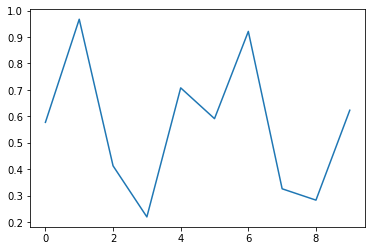

In [14]:
xs = range(0, 10)
# Символ ; здесь используется, чтобы не выводить служебную информацию на экран
plt.plot(xs, [random.random() for _ in xs]);

Добавим второй график к первому, а также добавим надписи.

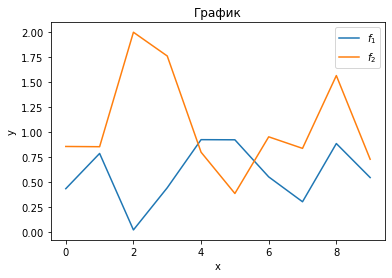

In [15]:
plt.plot(xs, [random.random() for _ in xs], label='$f_1$') # Нотация LaTeX
plt.plot(xs, [2 * random.random() for _ in xs], label='$f_2$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('График')
plt.legend();

Еще несколько примеров.

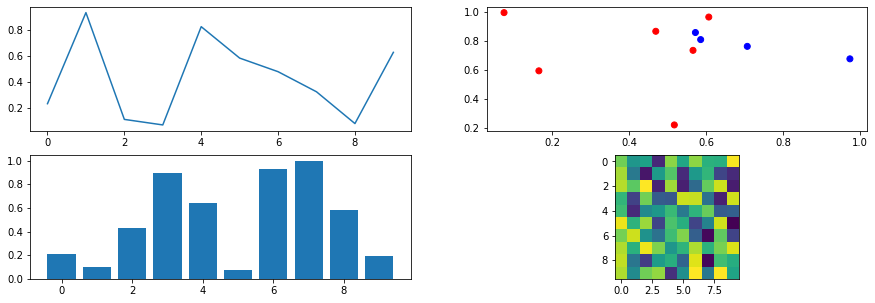

In [16]:
colors = [random.choice(['red', 'blue']) for _ in xs]
fig, axs = plt.subplots(2, 2, figsize=(15, 5))
axs[0, 0].plot([random.random() for _ in xs])
axs[0, 1].scatter([random.random() for _ in xs], [random.random() for _ in xs], c=colors)
axs[1, 0].bar(xs, [random.random() for _ in xs])
axs[1, 1].imshow([[random.random() for _ in xs] for _ in xs]);

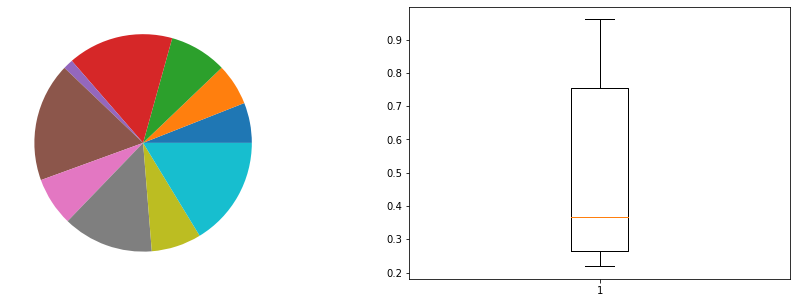

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].pie([random.random() for _ in xs])
axs[1].boxplot([random.random() for _ in xs]);

В [галерее](https://matplotlib.org/3.3.4/gallery/) официального сайта Matplotlib представлены примеры различных видов графиков, которые можно взять за основу для своих задач.